# Learning and Intelligent Decision Making

## Laboratory: Reinforcement learning


### 1. The key world domain

Consider once again the gridworld domain from the previous lab and which you modeled using a Markov decision problem.

<img src="https://ead.puc-rio.br/pluginfile.php/2512172/mod_resource/content/1/maze.png" width="200px" />

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability.

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$.

* When the movement fails, the agent remains in the same cell.

* To get a colored key, the agent simply needs to stand in the corresponding cell.

* The goal of the agent is to reach the cell marked with **"G"**.

Throughout the lab, use $\gamma=0.99$. As seen in the previous lab, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

In [3]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

# States
S = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']
num_states = len(S)
# Actions
A = ['U', 'D', 'L', 'R']
num_actions = len(A)

# Transition probabilities
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Reward function

Rw = np.array([[0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [1.0, 1.0, 1.0, 1.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0]])

# Discount rate

gamma = 0.99

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [4]:
import time

def get_q_values(V: np.ndarray) -> np.ndarray:
  """Calcula Q-values de uma dada state-value function V."""
  return Rw + gamma * np.array(P).dot(V).T

def value_iteration(P, Rw, gamma, theta=1e-8):
  """
  Executa o algoritmo Value Iteration.

  Retorna:
      V (np.array): A função de valor ótima V*.
      i (int): O número de iterações para convergir.
      execution_time (float): O tempo de execução em segundos.
  """
  nS, nA = Rw.shape

  V_star_vi = np.zeros(nS)
  iterations_vi = 0
  start_time = time.time()
  Q_vi_list = []
  while True:
    iterations_vi += 1
    delta = 0


    for s in range(nS):
      v_old = V_star_vi[s]

      # Calcula Q-values do estado s
      Q_star_vi = get_q_values(V_star_vi)[s]

      # Vincula o valor da melhor ação com o estado atual
      V_star_vi[s] = np.max(Q_star_vi)

      # Compara a distântica da iteração atual com a última
      delta = max(delta, np.abs(V_star_vi[s] - v_old))
      Q_vi_list.append(np.linalg.norm(V_star_vi[s] - v_old))

    # Para quando a convergência alcança o limiar de 10⁻⁸
    if delta < theta:
      break

  end_time = time.time()
  execution_time = end_time - start_time

  print(f"Convergência alcançada em {iterations_vi} iterações.")
  print(f"Tempo de execução: {execution_time:.4f} segundos.")
  return V_star_vi, iterations_vi, Q_star_vi, execution_time, Q_vi_list

In [5]:
V_star_vi, iterations_vi, Q_star_vi, time_vi, Q_vi_list = value_iteration(P=P, Rw=Rw, gamma=gamma)
print(V_star_vi)
print(Q_star_vi)

Convergência alcançada em 1834 iterações.
Tempo de execução: 0.9140 segundos.
[ 95.1   89.32  93.92  96.31  88.21  92.75  97.52  90.45  92.75  97.52
  89.32  91.59  98.75 100.    91.59  96.31]
[96.31 95.34 95.34 95.34]


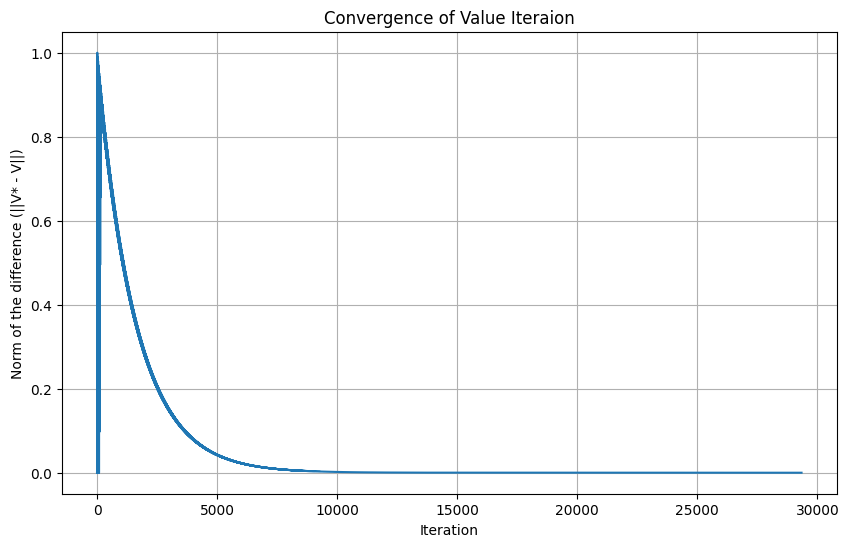

In [6]:
import matplotlib.pyplot as plt
# Use inline backend for better compatibility with Google Colab
#%matplotlib notebook
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(Q_vi_list)
plt.xlabel('Iteration')
plt.ylabel('Norm of the difference (||V* - V||)')
plt.title('Convergence of Value Iteraion')
plt.grid(True)

---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $s$, selects an action using the $\epsilon$-greedy policy. Specifically, your function should receive as input a Q-function $Q$, a state $s$, and a probability $\epsilon$ with a default value `eps=0.1`. Your function should return:

* a random action with a probability $\\epsilon$,
* an action corresponding to the maximum value of `Q` with a probability $1-\epsilon$. If more than one action has the same maximum `Q` value, the function should select one of these actions **uniformly at random**.

---

In [7]:
import numpy as np

# Função epsilon-greedy
def egreedy(Q, state, eps=0.1):
    p = np.random.random()
    if p < eps:
        # Exploration
        action = np.random.choice(num_actions)
    else:
        # Exploitation
        action = np.argmax(Q[state, :])
    return action

### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the reward function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* With the state and action, you will then compute the reward and generate the next state;
* With this transition information (state, action, reward, next state), you can now perform an update.
* When updating the components $(s,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(s,a)+1},$$

where $N_t(s,a)$ is the number of visits to the pair $(s,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the agent reaches the goal cell, make one further step, the corresponding update, and then reset the position of the agent to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

In [ ]:
def model_based_learning(
    Q_star: np.ndarray,
    P_star: list[np.ndarray],

    actions: list,
    states: list,
    alpha=0.3,
    gamma=0.99,
    epsilon=0.1,
    num_iterations=5000,
  ):
  # Inicializa o número de ações e estados
  num_actions = len(actions)
  num_states = len(states)
  # Inicializa o estado aleatoriamente
  state = np.random.randint(num_states)
  # Inicializa coletor de data points
  data_point = np.zeros((num_iterations, 4))
  # Inicializa cada matriz de probabilidade de transição como a identidade e a função de recompensa como zeros.
  P_est = [np.identity(num_states) for _ in range(num_actions)]
  # Inicializa matriz de reward estimada
  R_est = np.zeros((num_states, num_actions))

  for t in range(num_iterations):
    # Calcula uma ação usando a política epsilon-greedy
    action = egreedy(Q_star, state, eps=epsilon)
    # Escolhe o próximo estado com base na política de transição estimada
    next_state = np.random.choice(num_states, p=P_est[action][state, :])
    # Obtém a recompensa do estado atual e ação
    reward = R[state, action]
    
    # Armazena o data point da iteração atual    
    data_point[t] = [state, action, reward, next_state]
    state = next_state
    
  # Inicializa a matriz de visitas de estados x ações com zeros  
  actions_count = np.zeros((num_states, num_actions))
  visits = [np.zeros((num_states, num_actions)) for _ in range(num_actions)]
  norms = []
  # Computa visitas e recompensas
  for t in range(num_iterations):
    state, action, reward, next_state = data_point[t]
    visits[action][state, action] += 1
    actions_count[state, action] += 1
    alpha = 1 / (visits[action][state, action])
    # Atualiza a matriz de recompensa estimada
    R_est[state, action] += alpha * (reward - R_est[state, action])
    # Atualiza a lista de matrizes de transições estimadas
    P_est[action][state, :] += alpha * (np.eye(num_states)[next_state, :] - P_est[action][state, :])
    norm = np.linalg.norm(Q_star - R_est)
    norms.append(norm)







In [16]:
import matplotlib.pyplot as plt
# Use inline backend for better compatibility with Google Colab
#%matplotlib notebook
%matplotlib inline
mb_q_star, ml_q_list = model_based_q_learning(actions=A, states=S, alpha=0.7, gamma=0.99, epsilon=0.1, num_iterations=5000)
print(mb_q_star)
plt.figure(figsize=(10, 6))
plt.plot(ml_q_list)
plt.xlabel('Iteration')
plt.ylabel('Norm of the difference (||Q* - Q||)')
plt.title('Convergence of Model-Based RL')
plt.grid(True)

TypeError: model_based_q_learning() missing 1 required positional argument: 'Q_star'

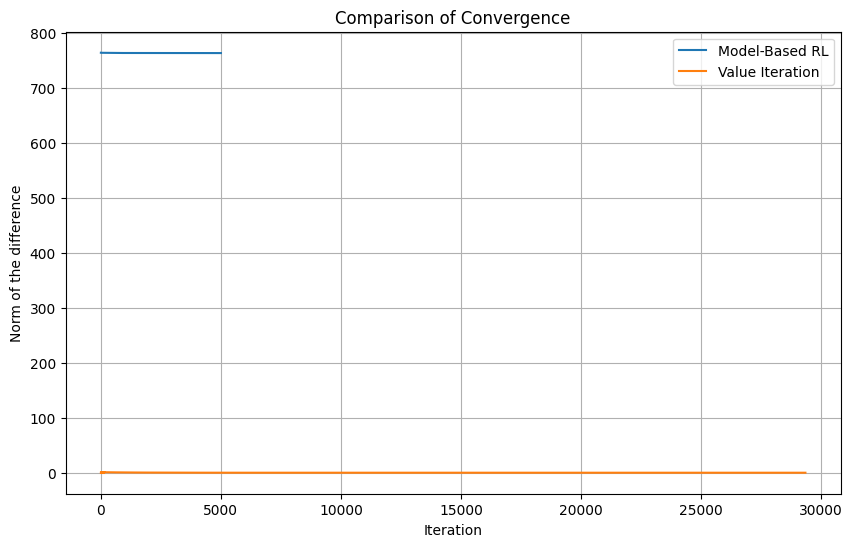

In [ ]:
import matplotlib.pyplot as plt
# Use inline backend for better compatibility with Google Colab
#%matplotlib notebook
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(ml_q_list, label='Model-Based RL')
plt.plot(Q_vi_list, label='Value Iteration')
plt.xlabel('Iteration')
plt.ylabel('Norm of the difference')
plt.title('Comparison of Convergence')
plt.legend()
plt.grid(True)
plt.show()

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

In [20]:
def model_free_based_q_learning(actions: list, states: list, alpha=0.3, gamma=0.99, epsilon=0.1, num_iterations=5000):
  num_actions = len(actions)
  num_states = len(states)
  Q = np.zeros((num_states, num_actions))
  # Inicializa contador de visitas
  visits = np.zeros((num_states, num_actions))
  norms = []
  state = 0
  visits = np.zeros((num_states, num_actions))

  for t in range(num_iterations):

    # Escolhe ação
    action = egreedy(Q, state, eps=epsilon) # Use the main Q table here

    # Escolhe próximo estado
    next_state = np.random.choice(num_states, p=P[action][state, :])

    # Obtém recompensa
    reward = R[state, action]
    visits[state, action] += 1
    alpha = 1 / (visits[state, action] + 1)
    # Atualiza Q
    Q[state, action] = Q[state, action] + alpha * (reward + gamma * max(Q[next_state, :]) - Q[state, action])

    #plot norm $\|Q^*-Q^{(k)}\|$
    norm_value = np.linalg.norm(Q_star_vi - Q)
    norms.append(norm_value) # Append the norm value to the list
  return Q, norms

[[1.96 1.59 1.64 1.02]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]]


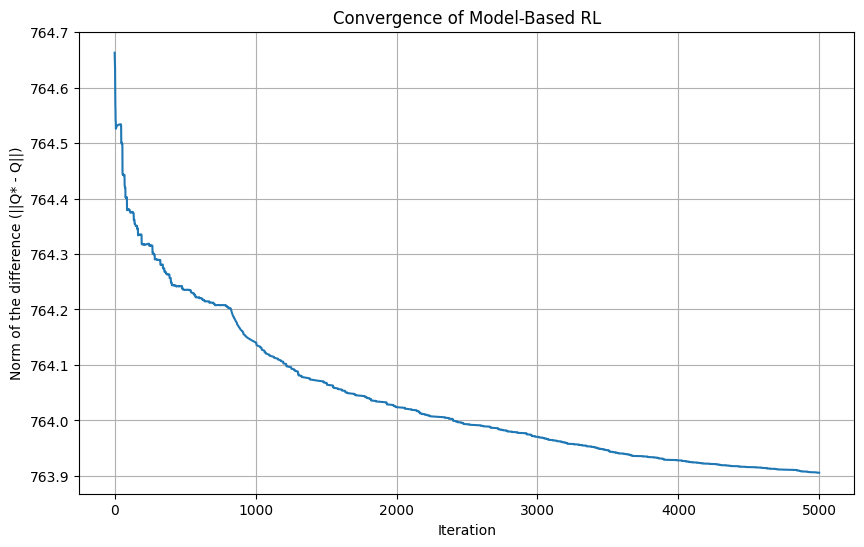

In [21]:
import matplotlib.pyplot as plt
# Use inline backend for better compatibility with Google Colab
#%matplotlib notebook
%matplotlib inline
mb_q_star, ml_q_list = model_free_based_q_learning(actions=A, states=S, alpha=0.3, gamma=0.99, epsilon=0.1, num_iterations=5000)
print(mb_q_star)
plt.figure(figsize=(10, 6))
plt.plot(ml_q_list)
plt.xlabel('Iteration')
plt.ylabel('Norm of the difference (||Q* - Q||)')
plt.title('Convergence of Model-Based RL')
plt.grid(True)

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

Write you answer here